# 오토인코더 분석

*Note: 최신 버전의 라이브러리를 사용하기 때문에 책의 내용과 결과가 다를 수 있습니다*

## 라이브러리 임포트

In [2]:
from google.colab import drive
import os

if os.path.exists('/content/drive') :
    drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
import os

GDL = '/content/drive/MyDrive/GDL_code'

sys.path.append(GDL)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

In [5]:
# # run params
# SECTION = 'vae'
# RUN_ID = '0001'
# DATA_NAME = 'digits'
# RUN_FOLDER = 'run/{}/'.format(SECTION)
# RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [8]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = os.path.join(GDL, RUN_FOLDER)

[SECTION, RUN_ID, DATA_NAME, RUN_FOLDER]

['vae',
 '0001',
 'digits',
 '/content/drive/MyDrive/GDL_code/run/vae/0001_digits']

## 데이터 적재

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 모델 구조 불러오기

In [9]:
AE = load_model(Autoencoder, RUN_FOLDER)

## 원본 그림 재구성

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


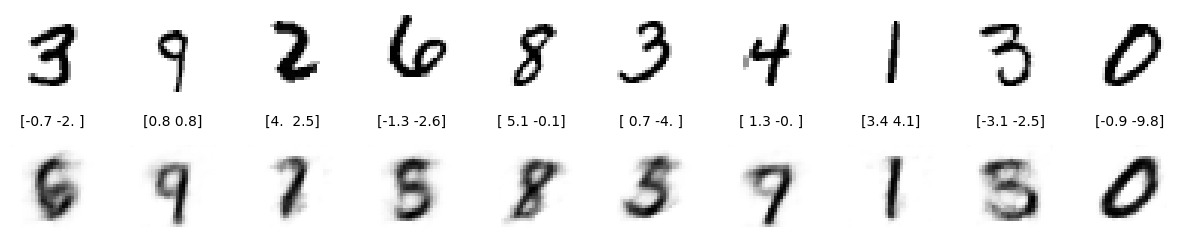

In [10]:
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## 엔 코더 씨의 전시벽

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


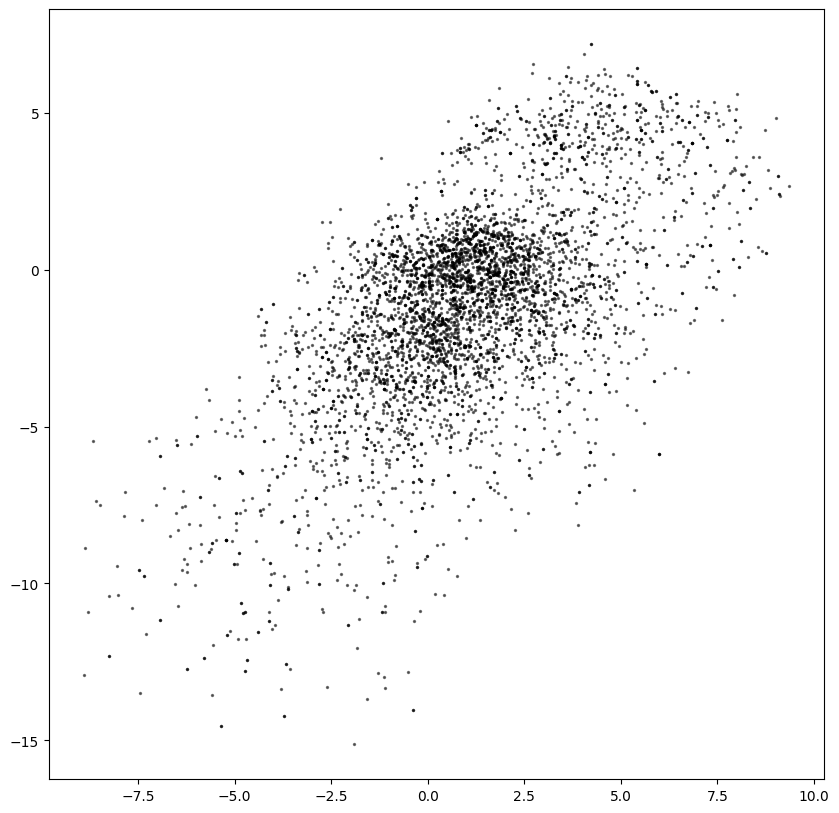

In [11]:
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

### 새로 생성한 미술 전시품

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


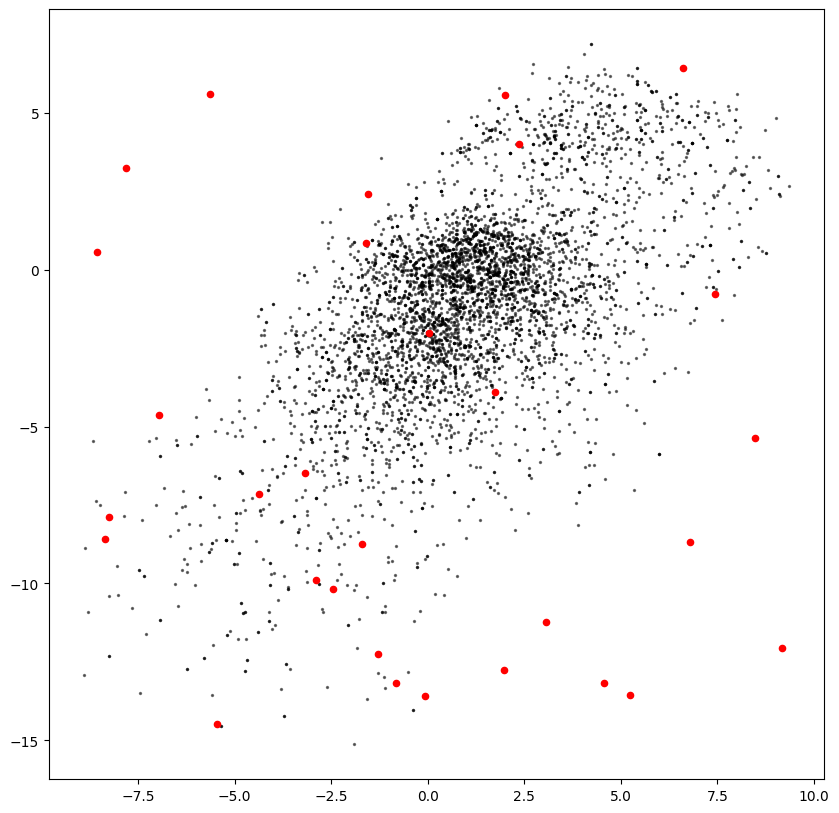

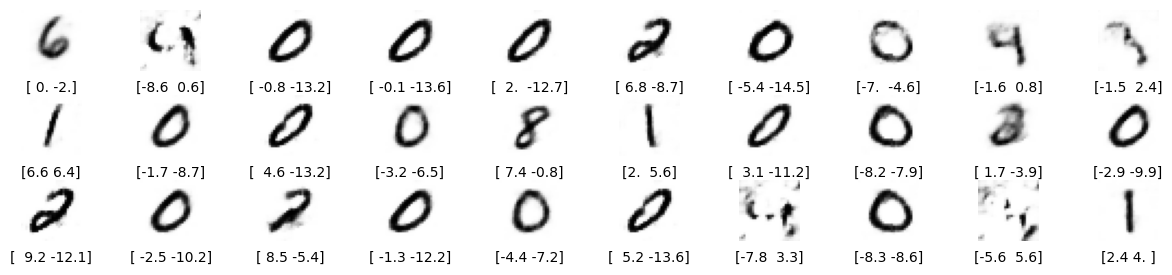

In [12]:
grid_size = 15
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)

    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

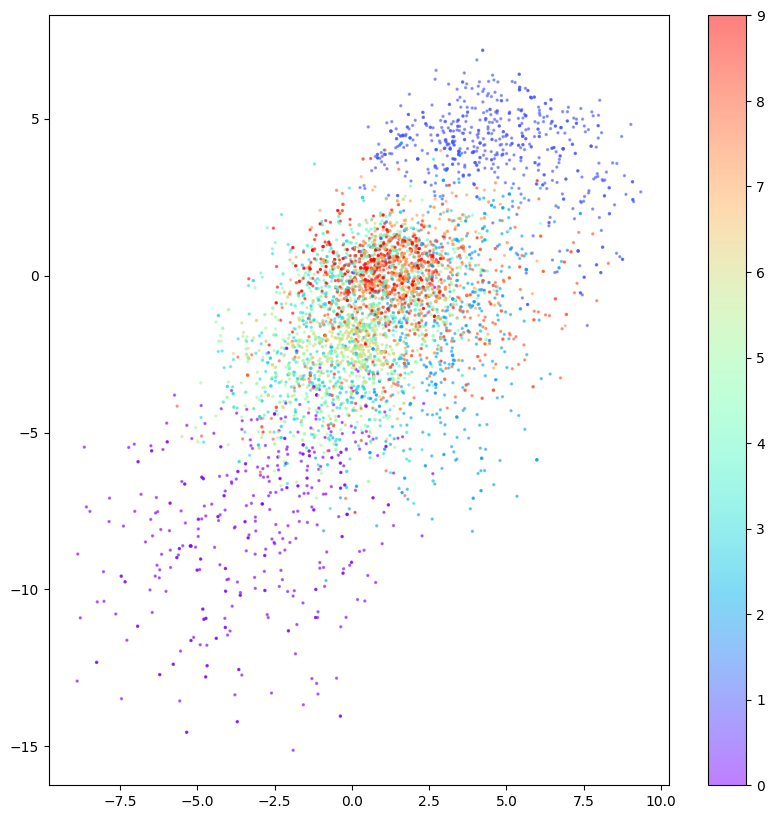

In [13]:
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

plt.show()

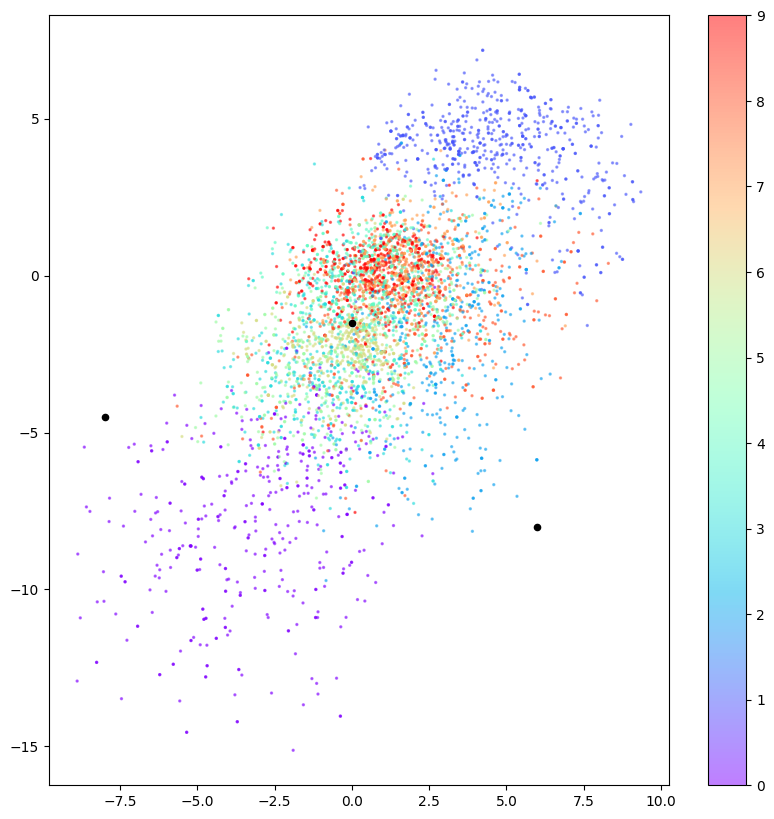

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


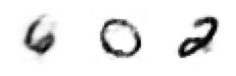

In [14]:
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

bad_examples = np.array([[0, -1.5], [-8, -4.5], [6, -8]])
plt.scatter(bad_examples[:, 0] , bad_examples[:, 1], c='black', alpha=1, s=20)

plt.show()

reconst = AE.decoder.predict(bad_examples)

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')

    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


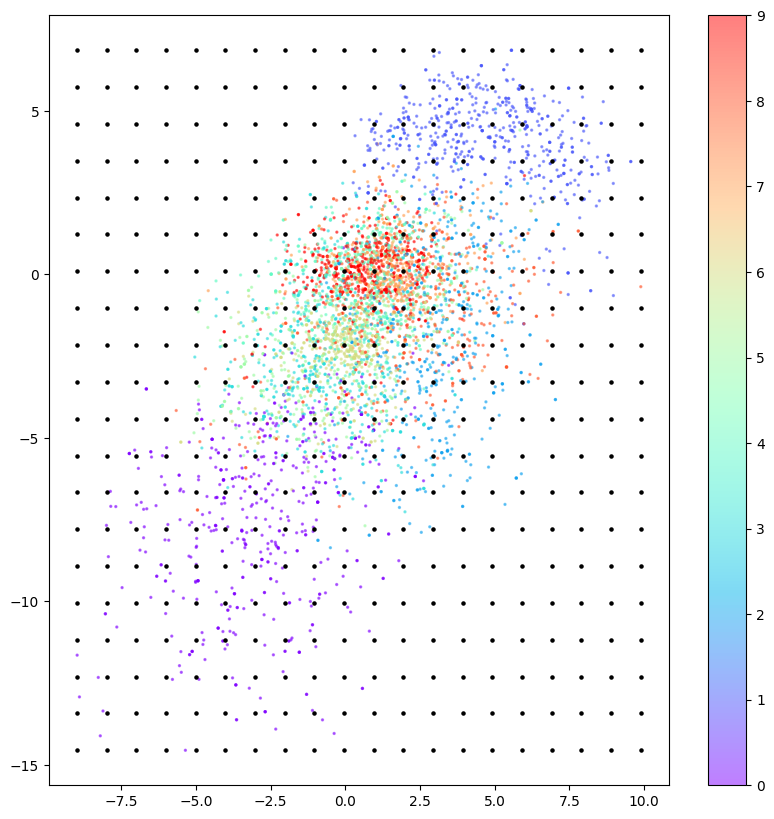

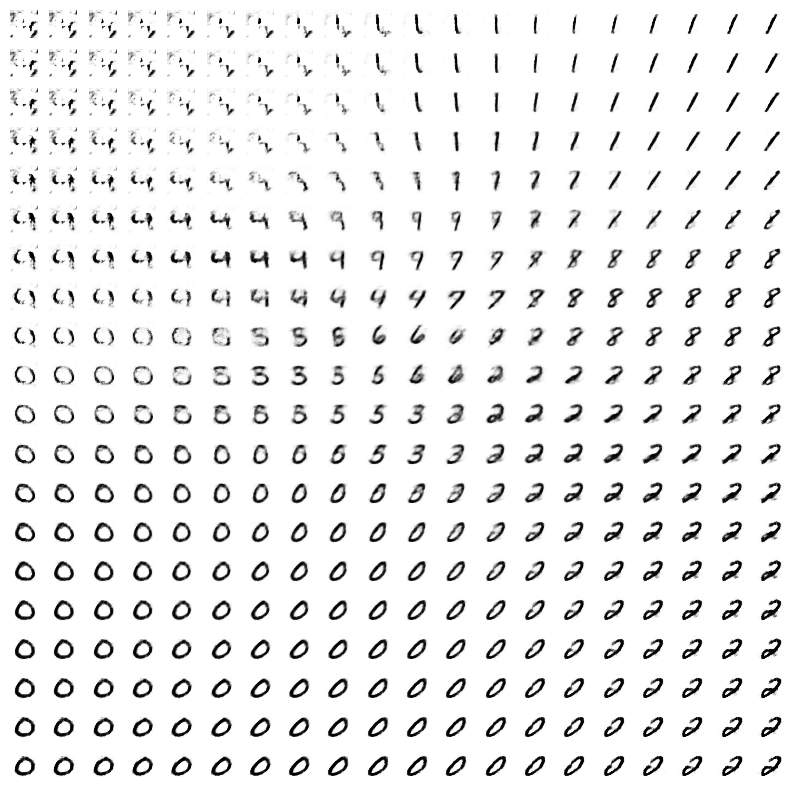

In [15]:
n_to_show = 5000
grid_size = 20

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')